In [25]:
# For processing the data
import numpy as np
import pandas as pd

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
%matplotlib inline
sns.set_style("white") # set style for seaborn plots

# Machine learning
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.metrics import make_scorer, log_loss
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (BaggingClassifier, ExtraTreesClassifier, 
                              GradientBoostingClassifier, VotingClassifier, 
                              RandomForestClassifier, AdaBoostClassifier)

# Ignore warnings
import warnings 
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv("training_set.csv")
df = pd.DataFrame(df)
df = df.drop(df.columns[0], axis = 1)
df.shape

(25697, 25)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   game_event_id       25697 non-null  int64  
 3   game_id             25697 non-null  int64  
 4   lat                 25697 non-null  float64
 5   loc_x               25697 non-null  int64  
 6   loc_y               25697 non-null  int64  
 7   lon                 25697 non-null  float64
 8   minutes_remaining   25697 non-null  int64  
 9   period              25697 non-null  int64  
 10  playoffs            25697 non-null  int64  
 11  season              25697 non-null  object 
 12  seconds_remaining   25697 non-null  int64  
 13  shot_distance       25697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           25697 non-null  object 
 16  shot

In [20]:
df.describe(include=['number'])

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [21]:
df.describe(include=['object'])

,action_type,combined_shot_type,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent
count,25697,25697,25697,25697,25697,25697,25697,25697,25697,25697,25697
unique,55,6,20,2,6,7,5,1,1558,74,33
top,Jump Shot,Jump Shot,2005-06,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,Los Angeles Lakers,2016-04-13,LAL @ SAS,SAS
freq,15836,19710,1924,20285,11289,10532,7857,25697,43,853,1638


In [22]:
df.set_index('shot_id')

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,
2,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
3,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
4,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
5,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
6,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Driving Layup Shot,Layup,382,49900088,34.0443,0,0,-118.2698,7,4,...,0.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND
30693,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND
30695,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND


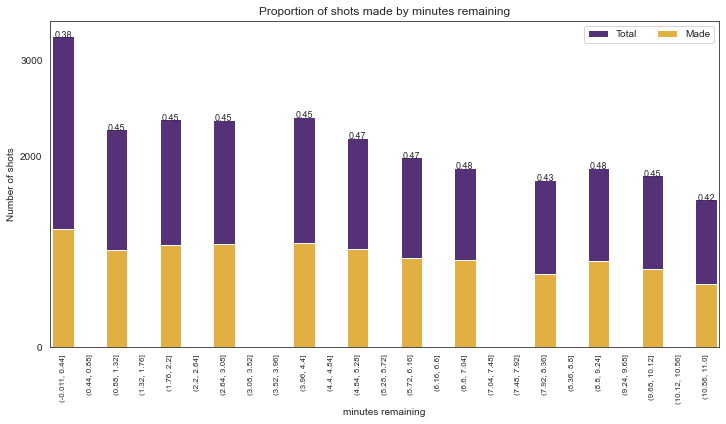

In [31]:
subset = df.copy()
subset["minutes"] = pd.cut(df["minutes_remaining"], bins=25)
df_grouped1 = subset.groupby("minutes").agg({"shot_made_flag": "count"}).reset_index()
df_shots_made = subset[subset["shot_made_flag"]==1]
df_grouped2 = df_shots_made.groupby("minutes").agg({"shot_made_flag": "count"}).reset_index()
proportions = round(df_grouped2["shot_made_flag"] / df_grouped1["shot_made_flag"], 2)

f, ax = plt.subplots(figsize=(12, 6))
# Plot total shots
g1 = sns.barplot(x="minutes", y="shot_made_flag", data=df_grouped1,
                 label="Total", color="#552583")

# Plot shots made
g2 = sns.barplot(x="minutes", y="shot_made_flag", data=df_grouped2,
                 label="Made", color="#FDB927")

idx = 0
for p in g1.patches:
    g1.annotate(proportions[idx],
               (p.get_x() + p.get_width() / 2., p.get_height()-80), 
                ha="center", va="center", 
                xytext=(0, 9), fontsize=9,
                textcoords="offset points")
    if idx < 24: idx += 1
    else: break
    
plt.yticks(ticks=[0, 2000, 3000])
plt.xticks(fontsize=8, rotation=90)
ax.set_title("Proportion of shots made by minutes remaining")
ax.set_xlabel("minutes remaining")
ax.set_ylabel("Number of shots")
ax.legend(ncol=2, loc="upper right", frameon=True);

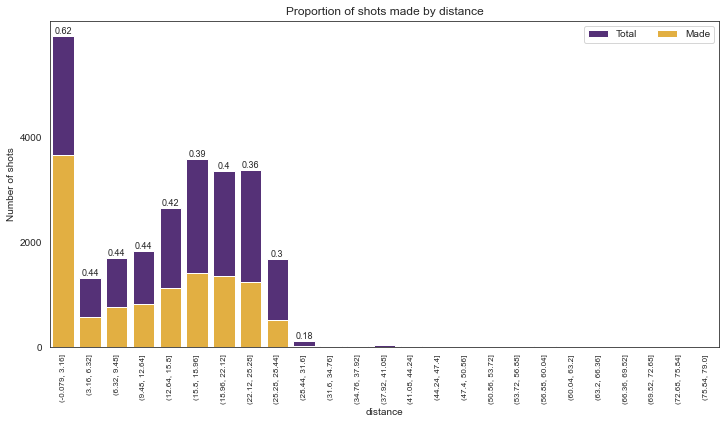

In [49]:
subset = df.copy()
subset["distance"] = pd.cut(df["shot_distance"], bins=25)
df_grouped1 = subset.groupby("distance").agg({"shot_made_flag": "count"}).reset_index()
df_shots_made = subset[subset["shot_made_flag"]==1]
df_grouped2 = df_shots_made.groupby("distance").agg({"shot_made_flag": "count"}).reset_index()
proportions = round(df_grouped2["shot_made_flag"] / df_grouped1["shot_made_flag"], 2)

f, ax = plt.subplots(figsize=(12, 6))
# Plot total shots
g1 = sns.barplot(x="distance", y="shot_made_flag", data=df_grouped1,
                 label="Total", color="#552583")

# Plot shots made
g2 = sns.barplot(x="distance", y="shot_made_flag", data=df_grouped2,
                 label="Made", color="#FDB927")

idx = 0
for p in g1.patches:
    g1.annotate(proportions[idx],
               (p.get_x() + p.get_width() / 2., p.get_height()-80), 
                ha="center", va="center", 
                xytext=(0, 9), fontsize=9,
                textcoords="offset points")
    if idx < 24: idx += 1
    else: break
    
plt.yticks(ticks=[0, 2000, 4000])
plt.xticks(fontsize=8, rotation=90)
ax.set_title("Proportion of shots made by distance")
ax.set_xlabel("distance")
ax.set_ylabel("Number of shots")
ax.legend(ncol=2, loc="upper right", frameon=True);

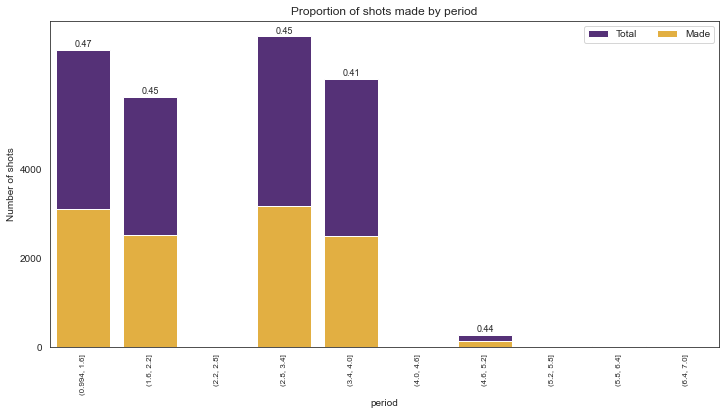

In [43]:
subset = df.copy()
subset["period"] = pd.cut(df["period"], bins=10)
df_grouped1 = subset.groupby("period").agg({"shot_made_flag": "count"}).reset_index()
df_shots_made = subset[subset["shot_made_flag"]==1]
df_grouped2 = df_shots_made.groupby("period").agg({"shot_made_flag": "count"}).reset_index()
proportions = round(df_grouped2["shot_made_flag"] / df_grouped1["shot_made_flag"], 2)

f, ax = plt.subplots(figsize=(12, 6))
# Plot total shots
g1 = sns.barplot(x="period", y="shot_made_flag", data=df_grouped1,
                 label="Total", color="#552583")

# Plot shots made
g2 = sns.barplot(x="period", y="shot_made_flag", data=df_grouped2,
                 label="Made", color="#FDB927")

idx = 0
for p in g1.patches:
    g1.annotate(proportions[idx],
               (p.get_x() + p.get_width() / 2., p.get_height()-80), 
                ha="center", va="center", 
                xytext=(0, 9), fontsize=9,
                textcoords="offset points")
    if idx < 9: idx += 1
    else: break
    
plt.yticks(ticks=[0, 2000, 4000])
plt.xticks(fontsize=8, rotation=90)
ax.set_title("Proportion of shots made by period")
ax.set_xlabel("period")
ax.set_ylabel("Number of shots")
ax.legend(ncol=2, loc="upper right", frameon=True);

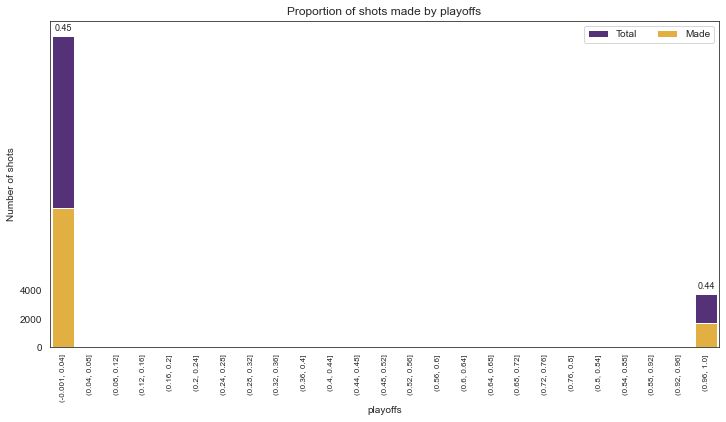

In [50]:
subset = df.copy()
subset["playoffs"] = pd.cut(df["playoffs"], bins=25)
df_grouped1 = subset.groupby("playoffs").agg({"shot_made_flag": "count"}).reset_index()
df_shots_made = subset[subset["shot_made_flag"]==1]
df_grouped2 = df_shots_made.groupby("playoffs").agg({"shot_made_flag": "count"}).reset_index()
proportions = round(df_grouped2["shot_made_flag"] / df_grouped1["shot_made_flag"], 2)

f, ax = plt.subplots(figsize=(12, 6))
# Plot total shots
g1 = sns.barplot(x="playoffs", y="shot_made_flag", data=df_grouped1,
                 label="Total", color="#552583")

# Plot shots made
g2 = sns.barplot(x="playoffs", y="shot_made_flag", data=df_grouped2,
                 label="Made", color="#FDB927")

idx = 0
for p in g1.patches:
    g1.annotate(proportions[idx],
               (p.get_x() + p.get_width() / 2., p.get_height()-80), 
                ha="center", va="center", 
                xytext=(0, 9), fontsize=9,
                textcoords="offset points")
    if idx < 24: idx += 1
    else: break
    
plt.yticks(ticks=[0, 2000, 4000])
plt.xticks(fontsize=8, rotation=90)
ax.set_title("Proportion of shots made by playoffs")
ax.set_xlabel("playoffs")
ax.set_ylabel("Number of shots")
ax.legend(ncol=2, loc="upper right", frameon=True);

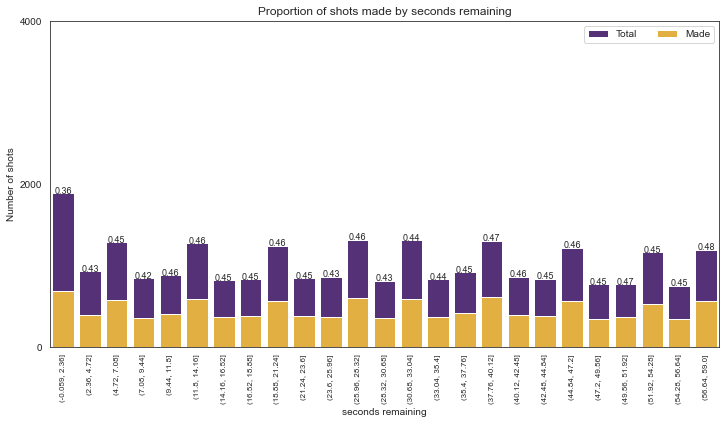

In [51]:
subset = df.copy()
subset["seconds"] = pd.cut(df["seconds_remaining"], bins=25)
df_grouped1 = subset.groupby("seconds").agg({"shot_made_flag": "count"}).reset_index()
df_shots_made = subset[subset["shot_made_flag"]==1]
df_grouped2 = df_shots_made.groupby("seconds").agg({"shot_made_flag": "count"}).reset_index()
proportions = round(df_grouped2["shot_made_flag"] / df_grouped1["shot_made_flag"], 2)

f, ax = plt.subplots(figsize=(12, 6))
# Plot total shots
g1 = sns.barplot(x="seconds", y="shot_made_flag", data=df_grouped1,
                 label="Total", color="#552583")

# Plot shots made
g2 = sns.barplot(x="seconds", y="shot_made_flag", data=df_grouped2,
                 label="Made", color="#FDB927")

idx = 0
for p in g1.patches:
    g1.annotate(proportions[idx],
               (p.get_x() + p.get_width() / 2., p.get_height()-80), 
                ha="center", va="center", 
                xytext=(0, 9), fontsize=9,
                textcoords="offset points")
    if idx < 24: idx += 1
    else: break
    
plt.yticks(ticks=[0, 2000, 4000])
plt.xticks(fontsize=8, rotation=90)
ax.set_title("Proportion of shots made by seconds remaining")
ax.set_xlabel("seconds remaining")
ax.set_ylabel("Number of shots")
ax.legend(ncol=2, loc="upper right", frameon=True);

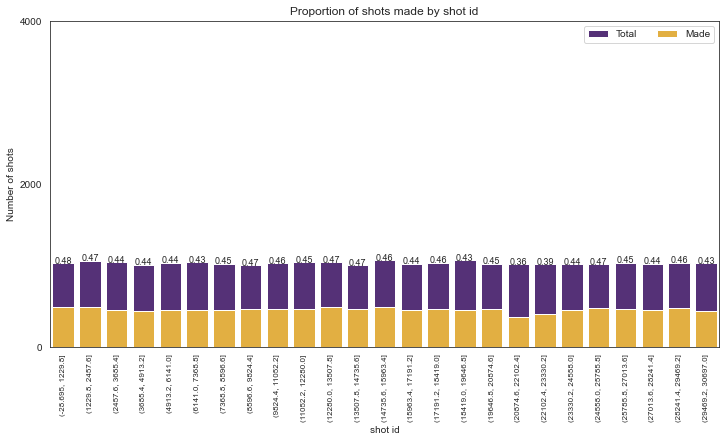

In [52]:
subset = df.copy()
subset["shot"] = pd.cut(df["shot_id"], bins=25)
df_grouped1 = subset.groupby("shot").agg({"shot_made_flag": "count"}).reset_index()
df_shots_made = subset[subset["shot_made_flag"]==1]
df_grouped2 = df_shots_made.groupby("shot").agg({"shot_made_flag": "count"}).reset_index()
proportions = round(df_grouped2["shot_made_flag"] / df_grouped1["shot_made_flag"], 2)

f, ax = plt.subplots(figsize=(12, 6))
# Plot total shots
g1 = sns.barplot(x="shot", y="shot_made_flag", data=df_grouped1,
                 label="Total", color="#552583")

# Plot shots made
g2 = sns.barplot(x="shot", y="shot_made_flag", data=df_grouped2,
                 label="Made", color="#FDB927")

idx = 0
for p in g1.patches:
    g1.annotate(proportions[idx],
               (p.get_x() + p.get_width() / 2., p.get_height()-80), 
                ha="center", va="center", 
                xytext=(0, 9), fontsize=9,
                textcoords="offset points")
    if idx < 24: idx += 1
    else: break
    
plt.yticks(ticks=[0, 2000, 4000])
plt.xticks(fontsize=8, rotation=90)
ax.set_title("Proportion of shots made by shot id")
ax.set_xlabel("shot id")
ax.set_ylabel("Number of shots")
ax.legend(ncol=2, loc="upper right", frameon=True);

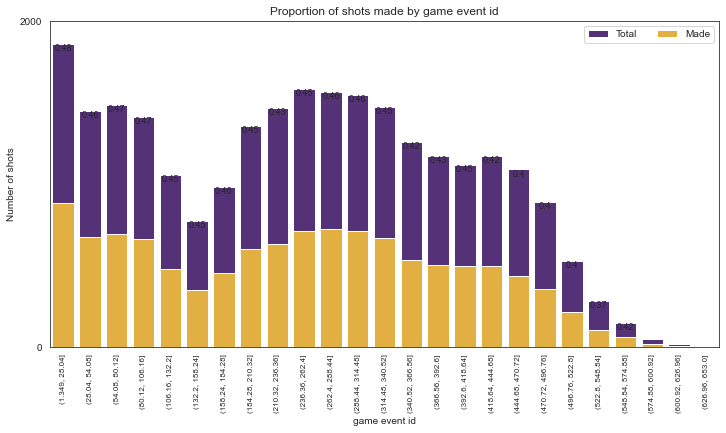

In [54]:
subset = df.copy()
subset["eventid"] = pd.cut(df["game_event_id"], bins=25)
df_grouped1 = subset.groupby("eventid").agg({"shot_made_flag": "count"}).reset_index()
df_shots_made = subset[subset["shot_made_flag"]==1]
df_grouped2 = df_shots_made.groupby("eventid").agg({"shot_made_flag": "count"}).reset_index()
proportions = round(df_grouped2["shot_made_flag"] / df_grouped1["shot_made_flag"], 2)

f, ax = plt.subplots(figsize=(12, 6))
# Plot total shots
g1 = sns.barplot(x="eventid", y="shot_made_flag", data=df_grouped1,
                 label="Total", color="#552583")

# Plot shots made
g2 = sns.barplot(x="eventid", y="shot_made_flag", data=df_grouped2,
                 label="Made", color="#FDB927")

idx = 0
for p in g1.patches:
    g1.annotate(proportions[idx],
               (p.get_x() + p.get_width() / 2., p.get_height()-80), 
                ha="center", va="center", 
                xytext=(0, 9), fontsize=9,
                textcoords="offset points")
    if idx < 24: idx += 1
    else: break
    
plt.yticks(ticks=[0, 2000])
plt.xticks(fontsize=8, rotation=90)
ax.set_title("Proportion of shots made by game event id")
ax.set_xlabel("game event id")
ax.set_ylabel("Number of shots")
ax.legend(ncol=2, loc="upper right", frameon=True);

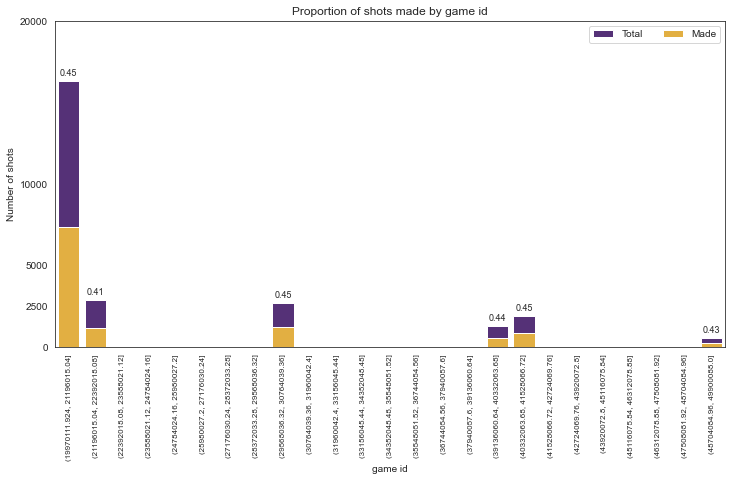

In [57]:
subset = df.copy()
subset["gameid"] = pd.cut(df["game_id"], bins=25)
df_grouped1 = subset.groupby("gameid").agg({"shot_made_flag": "count"}).reset_index()
df_shots_made = subset[subset["shot_made_flag"]==1]
df_grouped2 = df_shots_made.groupby("gameid").agg({"shot_made_flag": "count"}).reset_index()
proportions = round(df_grouped2["shot_made_flag"] / df_grouped1["shot_made_flag"], 2)

f, ax = plt.subplots(figsize=(12, 6))
# Plot total shots
g1 = sns.barplot(x="gameid", y="shot_made_flag", data=df_grouped1,
                 label="Total", color="#552583")

# Plot shots made
g2 = sns.barplot(x="gameid", y="shot_made_flag", data=df_grouped2,
                 label="Made", color="#FDB927")

idx = 0
for p in g1.patches:
    g1.annotate(proportions[idx],
               (p.get_x() + p.get_width() / 2., p.get_height()-80), 
                ha="center", va="center", 
                xytext=(0, 9), fontsize=9,
                textcoords="offset points")
    if idx < 24: idx += 1
    else: break
    
plt.yticks(ticks=[0, 2500, 5000, 10000, 20000])
plt.xticks(fontsize=8, rotation=90)
ax.set_title("Proportion of shots made by game id")
ax.set_xlabel("game id")
ax.set_ylabel("Number of shots")
ax.legend(ncol=2, loc="upper right", frameon=True);

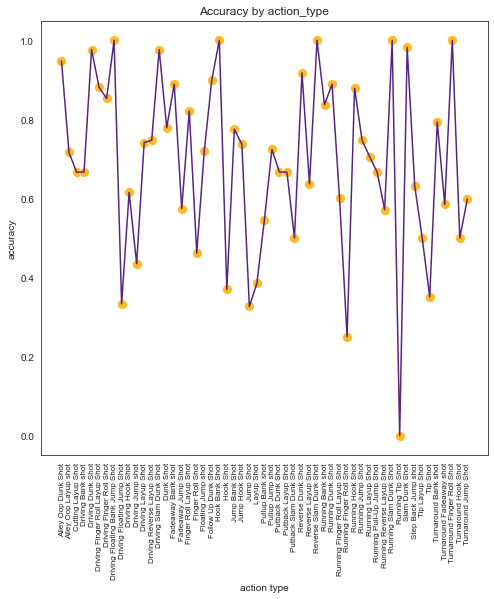

In [78]:
subset1 = df[["action_type", "shot_made_flag"]].dropna()
subset1["shot_made_flag"] = pd.to_numeric(subset1["shot_made_flag"])
df_grouped1 = subset1.groupby("action_type").agg({"shot_made_flag": "mean"}).reset_index()

f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.lineplot(x="action_type", y="shot_made_flag", data=df_grouped1, color="#552583", ax=ax);
sns.scatterplot(x="action_type", y="shot_made_flag", data=df_grouped1, s=100, color="#FDB927", ax=ax)
ax.set_title("Accuracy by action_type")
ax.set_xlabel("action type")
ax.set_ylabel("accuracy")
plt.xticks(fontsize=8, rotation=90);

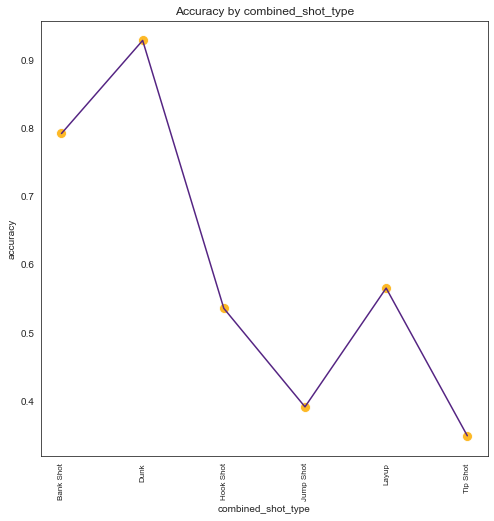

In [80]:
subset2 = df[["combined_shot_type", "shot_made_flag"]].dropna()
subset2["shot_made_flag"] = pd.to_numeric(subset2["shot_made_flag"])
df_grouped2 = subset2.groupby("combined_shot_type").agg({"shot_made_flag": "mean"}).reset_index()

f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.lineplot(x="combined_shot_type", y="shot_made_flag", data=df_grouped2, color="#552583", ax=ax);
sns.scatterplot(x="combined_shot_type", y="shot_made_flag", data=df_grouped2, s=100, color="#FDB927", ax=ax)
ax.set_title("Accuracy by combined_shot_type")
ax.set_xlabel("combined_shot_type")
ax.set_ylabel("accuracy")
plt.xticks(fontsize=8, rotation=90);

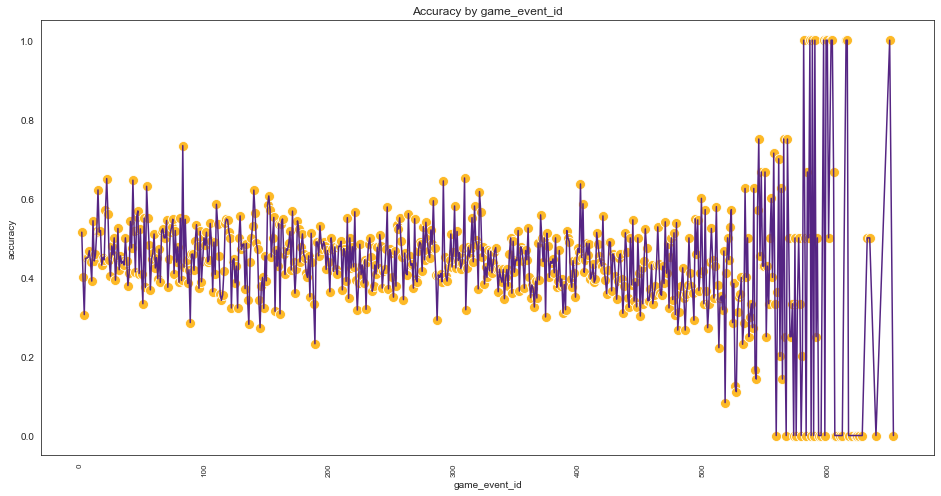

In [84]:
subset3 = df[["game_event_id", "shot_made_flag"]].dropna()
subset3["shot_made_flag"] = pd.to_numeric(subset3["shot_made_flag"])
df_grouped3 = subset3.groupby("game_event_id").agg({"shot_made_flag": "mean"}).reset_index()

f, ax = plt.subplots(1, 1, figsize=(16,8))
sns.lineplot(x="game_event_id", y="shot_made_flag", data=df_grouped3, color="#552583", ax=ax);
sns.scatterplot(x="game_event_id", y="shot_made_flag", data=df_grouped3, s=100, color="#FDB927", ax=ax)
ax.set_title("Accuracy by game_event_id")
ax.set_xlabel("game_event_id")
ax.set_ylabel("accuracy")
plt.xticks(fontsize=8, rotation=90);

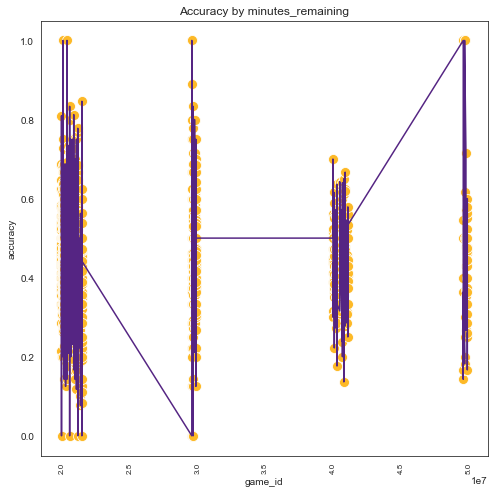

In [85]:
subset4 = df[["game_id", "shot_made_flag"]].dropna()
subset4["shot_made_flag"] = pd.to_numeric(subset4["shot_made_flag"])
df_grouped4 = subset4.groupby("game_id").agg({"shot_made_flag": "mean"}).reset_index()

f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.lineplot(x="game_id", y="shot_made_flag", data=df_grouped4, color="#552583", ax=ax);
sns.scatterplot(x="game_id", y="shot_made_flag", data=df_grouped4, s=100, color="#FDB927", ax=ax)
ax.set_title("Accuracy by game_id")
ax.set_xlabel("game_id")
ax.set_ylabel("accuracy")
plt.xticks(fontsize=8, rotation=90);

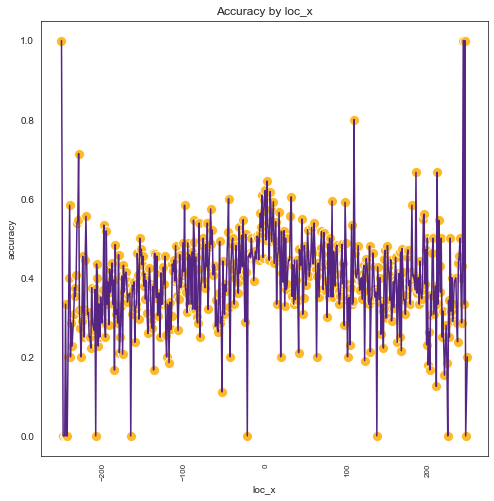

In [87]:
subset5 = df[["loc_x", "shot_made_flag"]].dropna()
subset5["shot_made_flag"] = pd.to_numeric(subset5["shot_made_flag"])
df_grouped5 = subset5.groupby("loc_x").agg({"shot_made_flag": "mean"}).reset_index()

f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.lineplot(x="loc_x", y="shot_made_flag", data=df_grouped5, color="#552583", ax=ax);
sns.scatterplot(x="loc_x", y="shot_made_flag", data=df_grouped5, s=100, color="#FDB927", ax=ax)
ax.set_title("Accuracy by loc_x")
ax.set_xlabel("loc_x")
ax.set_ylabel("accuracy")
plt.xticks(fontsize=8, rotation=90);

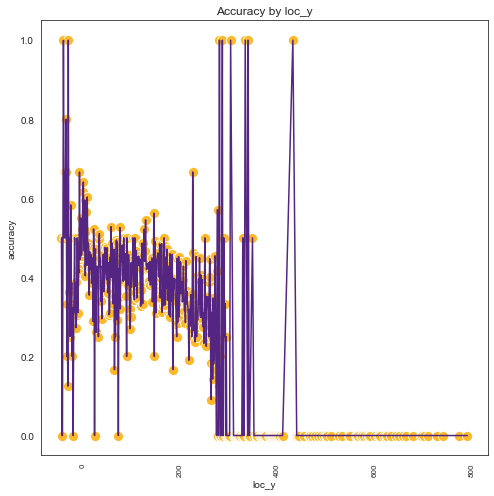

In [88]:
subset6 = df[["loc_y", "shot_made_flag"]].dropna()
subset6["shot_made_flag"] = pd.to_numeric(subset6["shot_made_flag"])
df_grouped6 = subset6.groupby("loc_y").agg({"shot_made_flag": "mean"}).reset_index()

f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.lineplot(x="loc_y", y="shot_made_flag", data=df_grouped6, color="#552583", ax=ax);
sns.scatterplot(x="loc_y", y="shot_made_flag", data=df_grouped6, s=100, color="#FDB927", ax=ax)
ax.set_title("Accuracy by loc_y")
ax.set_xlabel("loc_y")
ax.set_ylabel("accuracy")
plt.xticks(fontsize=8, rotation=90);

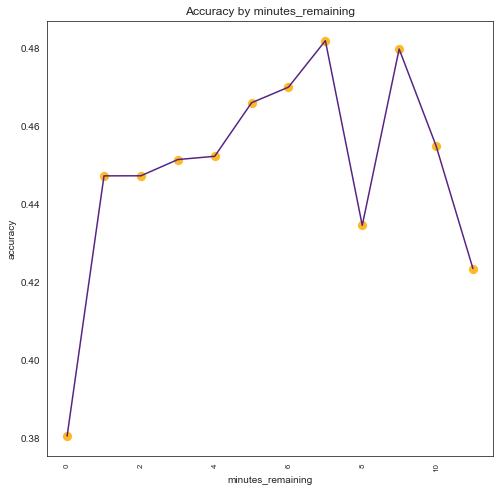

In [89]:
subset7 = df[["minutes_remaining", "shot_made_flag"]].dropna()
subset7["shot_made_flag"] = pd.to_numeric(subset7["shot_made_flag"])
df_grouped7 = subset7.groupby("minutes_remaining").agg({"shot_made_flag": "mean"}).reset_index()

f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.lineplot(x="minutes_remaining", y="shot_made_flag", data=df_grouped7, color="#552583", ax=ax);
sns.scatterplot(x="minutes_remaining", y="shot_made_flag", data=df_grouped7, s=100, color="#FDB927", ax=ax)
ax.set_title("Accuracy by minutes_remaining")
ax.set_xlabel("minutes_remaining")
ax.set_ylabel("accuracy")
plt.xticks(fontsize=8, rotation=90);

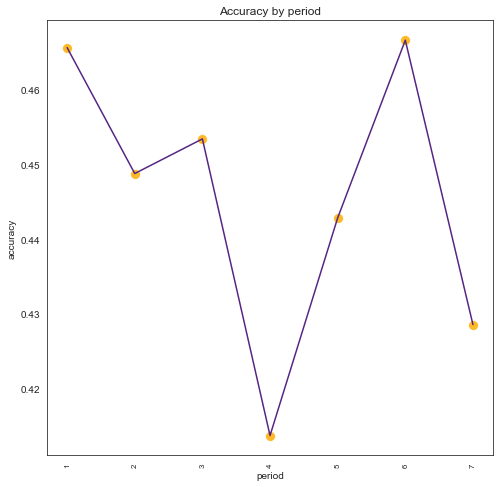

In [91]:
subset8 = df[["period", "shot_made_flag"]].dropna()
subset8["shot_made_flag"] = pd.to_numeric(subset8["shot_made_flag"])
df_grouped8 = subset8.groupby("period").agg({"shot_made_flag": "mean"}).reset_index()

f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.lineplot(x="period", y="shot_made_flag", data=df_grouped8, color="#552583", ax=ax);
sns.scatterplot(x="period", y="shot_made_flag", data=df_grouped8, s=100, color="#FDB927", ax=ax)
ax.set_title("Accuracy by period")
ax.set_xlabel("period")
ax.set_ylabel("accuracy")
plt.xticks(fontsize=8, rotation=90);

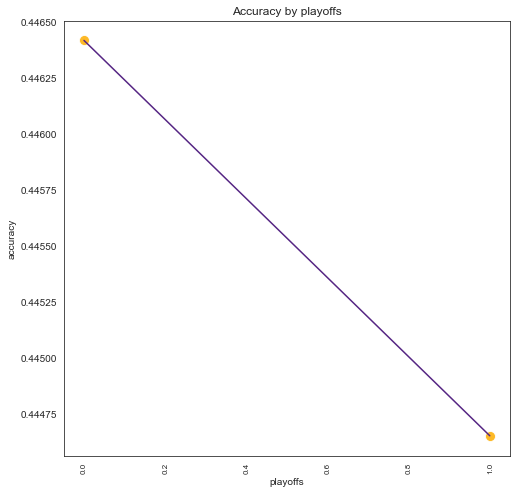

In [93]:
subset9 = df[["playoffs", "shot_made_flag"]].dropna()
subset9["shot_made_flag"] = pd.to_numeric(subset9["shot_made_flag"])
df_grouped9 = subset9.groupby("playoffs").agg({"shot_made_flag": "mean"}).reset_index()

f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.lineplot(x="playoffs", y="shot_made_flag", data=df_grouped9, color="#552583", ax=ax);
sns.scatterplot(x="playoffs", y="shot_made_flag", data=df_grouped9, s=100, color="#FDB927", ax=ax)
ax.set_title("Accuracy by playoffs")
ax.set_xlabel("playoffs")
ax.set_ylabel("accuracy")
plt.xticks(fontsize=8, rotation=90);

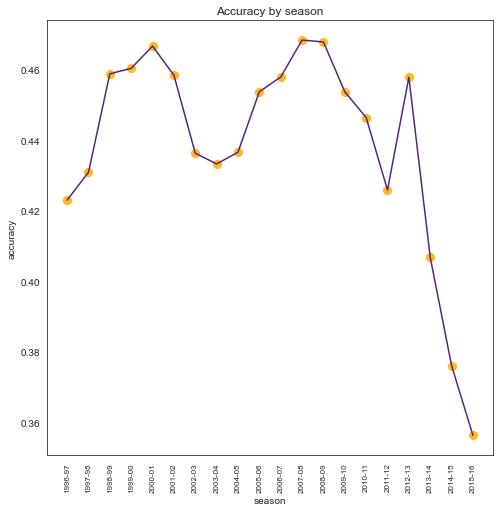

In [94]:
subset10 = df[["season", "shot_made_flag"]].dropna()
subset10["shot_made_flag"] = pd.to_numeric(subset10["shot_made_flag"])
df_grouped10 = subset10.groupby("season").agg({"shot_made_flag": "mean"}).reset_index()

f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.lineplot(x="season", y="shot_made_flag", data=df_grouped10, color="#552583", ax=ax);
sns.scatterplot(x="season", y="shot_made_flag", data=df_grouped10, s=100, color="#FDB927", ax=ax)
ax.set_title("Accuracy by season")
ax.set_xlabel("season")
ax.set_ylabel("accuracy")
plt.xticks(fontsize=8, rotation=90);

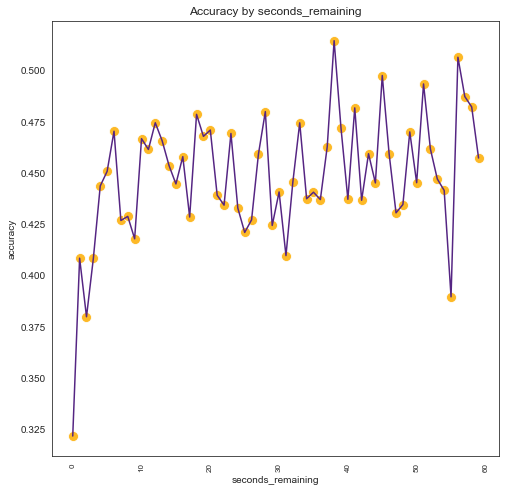

In [95]:
subset11 = df[["seconds_remaining", "shot_made_flag"]].dropna()
subset11["shot_made_flag"] = pd.to_numeric(subset11["shot_made_flag"])
df_grouped11 = subset11.groupby("seconds_remaining").agg({"shot_made_flag": "mean"}).reset_index()

f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.lineplot(x="seconds_remaining", y="shot_made_flag", data=df_grouped11, color="#552583", ax=ax);
sns.scatterplot(x="seconds_remaining", y="shot_made_flag", data=df_grouped11, s=100, color="#FDB927", ax=ax)
ax.set_title("Accuracy by seconds_remaining")
ax.set_xlabel("seconds_remaining")
ax.set_ylabel("accuracy")
plt.xticks(fontsize=8, rotation=90);

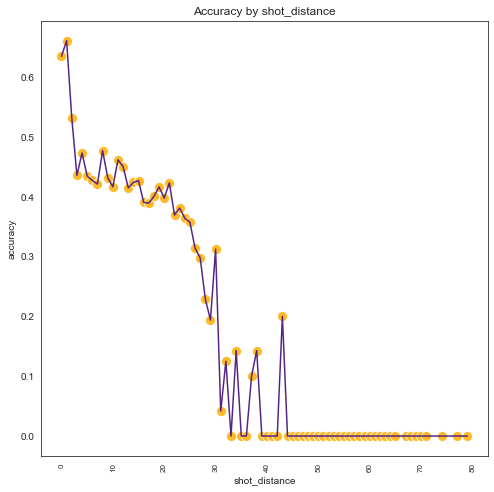

In [96]:
subset12 = df[["shot_distance", "shot_made_flag"]].dropna()
subset12["shot_made_flag"] = pd.to_numeric(subset12["shot_made_flag"])
df_grouped12 = subset12.groupby("shot_distance").agg({"shot_made_flag": "mean"}).reset_index()

f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.lineplot(x="shot_distance", y="shot_made_flag", data=df_grouped12, color="#552583", ax=ax);
sns.scatterplot(x="shot_distance", y="shot_made_flag", data=df_grouped12, s=100, color="#FDB927", ax=ax)
ax.set_title("Accuracy by shot_distance")
ax.set_xlabel("shot_distance")
ax.set_ylabel("accuracy")
plt.xticks(fontsize=8, rotation=90);

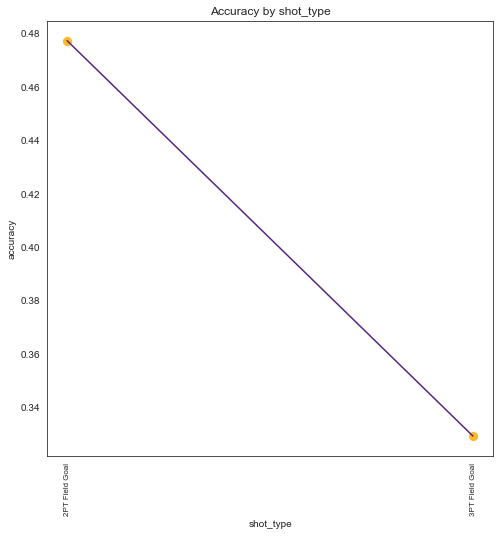

In [97]:
subset13 = df[["shot_type", "shot_made_flag"]].dropna()
subset13["shot_made_flag"] = pd.to_numeric(subset13["shot_made_flag"])
df_grouped13 = subset13.groupby("shot_type").agg({"shot_made_flag": "mean"}).reset_index()

f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.lineplot(x="shot_type", y="shot_made_flag", data=df_grouped13, color="#552583", ax=ax);
sns.scatterplot(x="shot_type", y="shot_made_flag", data=df_grouped13, s=100, color="#FDB927", ax=ax)
ax.set_title("Accuracy by shot_type")
ax.set_xlabel("shot_type")
ax.set_ylabel("accuracy")
plt.xticks(fontsize=8, rotation=90);

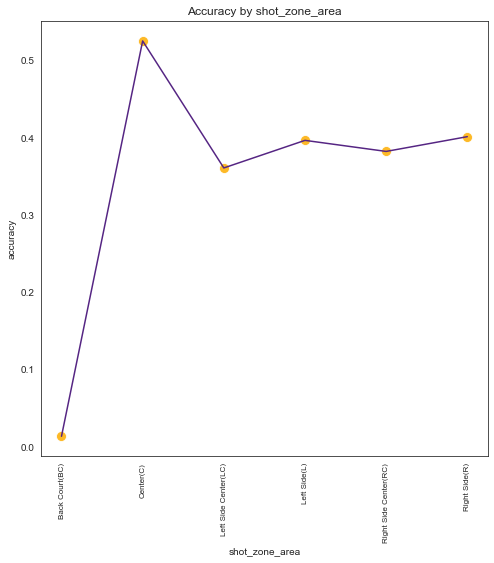

In [98]:
subset14 = df[["shot_zone_area", "shot_made_flag"]].dropna()
subset14["shot_made_flag"] = pd.to_numeric(subset14["shot_made_flag"])
df_grouped14 = subset14.groupby("shot_zone_area").agg({"shot_made_flag": "mean"}).reset_index()

f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.lineplot(x="shot_zone_area", y="shot_made_flag", data=df_grouped14, color="#552583", ax=ax);
sns.scatterplot(x="shot_zone_area", y="shot_made_flag", data=df_grouped14, s=100, color="#FDB927", ax=ax)
ax.set_title("Accuracy by shot_zone_area")
ax.set_xlabel("shot_zone_area")
ax.set_ylabel("accuracy")
plt.xticks(fontsize=8, rotation=90);

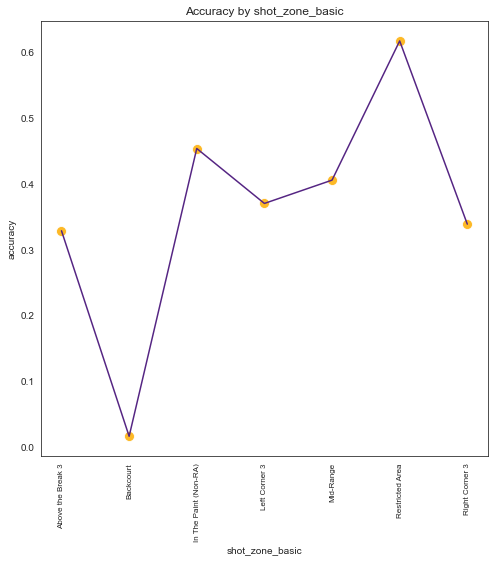

In [101]:
subset15 = df[["shot_zone_basic", "shot_made_flag"]].dropna()
subset15["shot_made_flag"] = pd.to_numeric(subset15["shot_made_flag"])
df_grouped15 = subset15.groupby("shot_zone_basic").agg({"shot_made_flag": "mean"}).reset_index()

f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.lineplot(x="shot_zone_basic", y="shot_made_flag", data=df_grouped15, color="#552583", ax=ax);
sns.scatterplot(x="shot_zone_basic", y="shot_made_flag", data=df_grouped15, s=100, color="#FDB927", ax=ax)
ax.set_title("Accuracy by shot_zone_basic")
ax.set_xlabel("shot_zone_basic")
ax.set_ylabel("accuracy")
plt.xticks(fontsize=8, rotation=90);

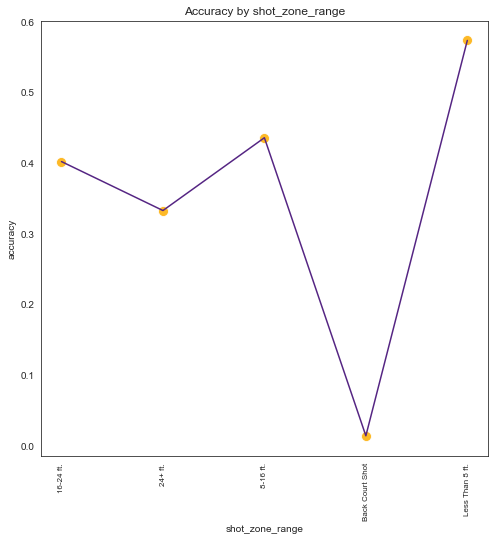

In [102]:
subset16 = df[["shot_zone_range", "shot_made_flag"]].dropna()
subset16["shot_made_flag"] = pd.to_numeric(subset16["shot_made_flag"])
df_grouped16 = subset16.groupby("shot_zone_range").agg({"shot_made_flag": "mean"}).reset_index()

f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.lineplot(x="shot_zone_range", y="shot_made_flag", data=df_grouped16, color="#552583", ax=ax);
sns.scatterplot(x="shot_zone_range", y="shot_made_flag", data=df_grouped16, s=100, color="#FDB927", ax=ax)
ax.set_title("Accuracy by shot_zone_range")
ax.set_xlabel("shot_zone_range")
ax.set_ylabel("accuracy")
plt.xticks(fontsize=8, rotation=90);

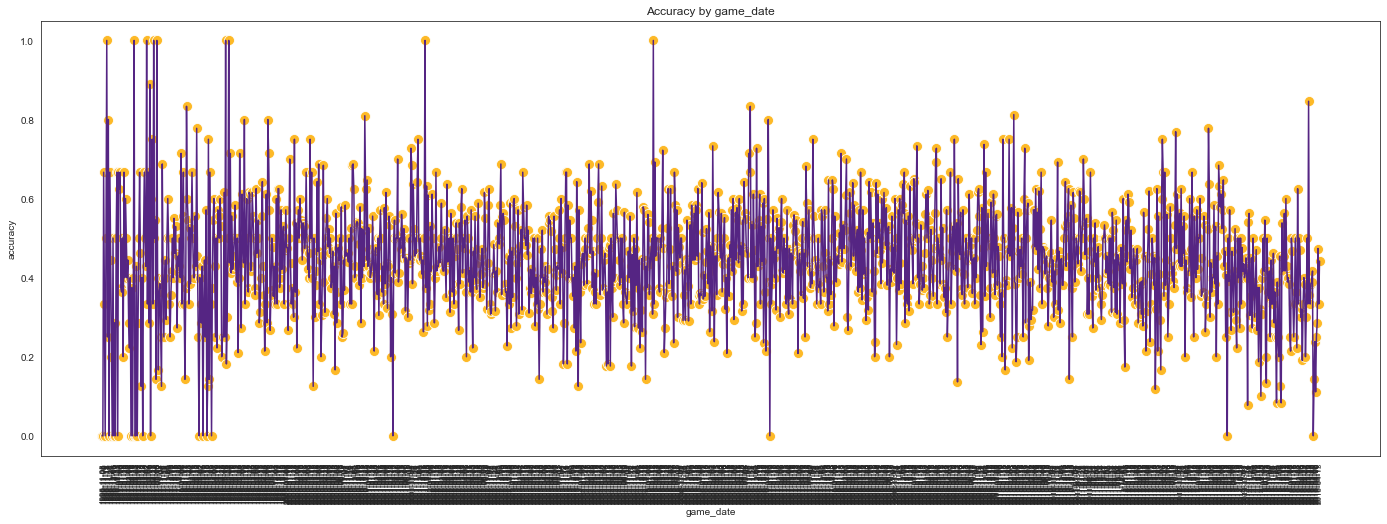

In [105]:
subset17 = df[["game_date", "shot_made_flag"]].dropna()
subset17["shot_made_flag"] = pd.to_numeric(subset17["shot_made_flag"])
df_grouped17 = subset17.groupby("game_date").agg({"shot_made_flag": "mean"}).reset_index()

f, ax = plt.subplots(1, 1, figsize=(24,8))
sns.lineplot(x="game_date", y="shot_made_flag", data=df_grouped17, color="#552583", ax=ax);
sns.scatterplot(x="game_date", y="shot_made_flag", data=df_grouped17, s=100, color="#FDB927", ax=ax)
ax.set_title("Accuracy by game_date")
ax.set_xlabel("game_date")
ax.set_ylabel("accuracy")
plt.xticks(fontsize=8, rotation=90);

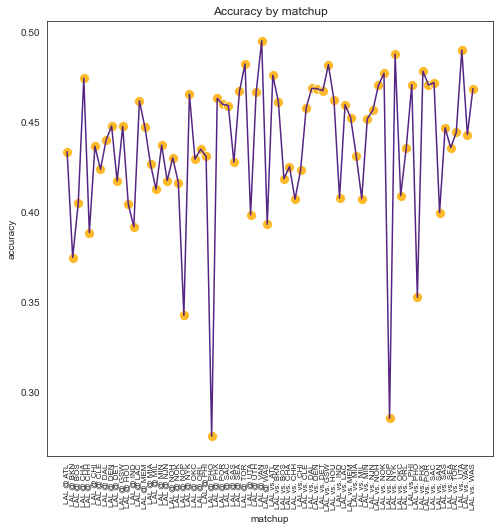

In [106]:
subset18 = df[["matchup", "shot_made_flag"]].dropna()
subset18["shot_made_flag"] = pd.to_numeric(subset18["shot_made_flag"])
df_grouped18 = subset18.groupby("matchup").agg({"shot_made_flag": "mean"}).reset_index()

f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.lineplot(x="matchup", y="shot_made_flag", data=df_grouped18, color="#552583", ax=ax);
sns.scatterplot(x="matchup", y="shot_made_flag", data=df_grouped18, s=100, color="#FDB927", ax=ax)
ax.set_title("Accuracy by matchup")
ax.set_xlabel("matchup")
ax.set_ylabel("accuracy")
plt.xticks(fontsize=8, rotation=90);

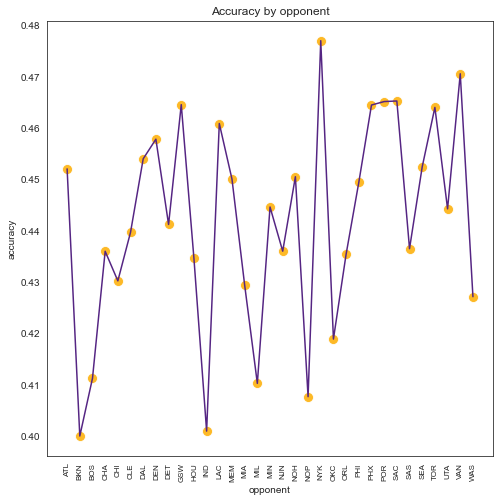

In [107]:
subset19 = df[["opponent", "shot_made_flag"]].dropna()
subset19["shot_made_flag"] = pd.to_numeric(subset19["shot_made_flag"])
df_grouped19 = subset19.groupby("opponent").agg({"shot_made_flag": "mean"}).reset_index()

f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.lineplot(x="opponent", y="shot_made_flag", data=df_grouped19, color="#552583", ax=ax);
sns.scatterplot(x="opponent", y="shot_made_flag", data=df_grouped19, s=100, color="#FDB927", ax=ax)
ax.set_title("Accuracy by opponent")
ax.set_xlabel("opponent")
ax.set_ylabel("accuracy")
plt.xticks(fontsize=8, rotation=90);